## Waste Management using CNN Model

In [8]:
pip install --user glob


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement glob (from versions: none)

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for glob


In [1]:
 # Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_path ="dataset/TRAIN"
test_path = "dataset/TEST"

In [3]:
# Importing Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [4]:
# visualization
from cv2 import cvtColor
x_data = []
y_data = []
for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array = cv2.imread(file)
        img_array = cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
data = pd.DataFrame({'image':x_data,'label':y_data})


100%|██████████| 9999/9999 [00:05<00:00, 1850.45it/s]


In [5]:
data.shape

(22564, 2)

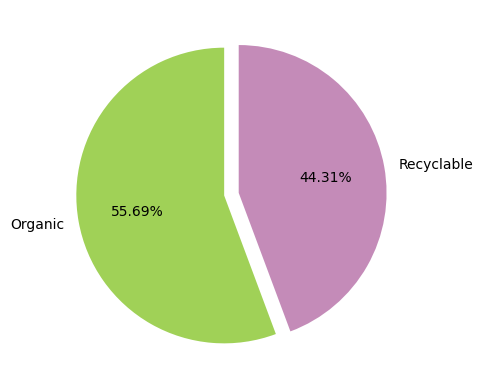

In [6]:
colors = ['#a0d157', '#c48bb8']
plt.pie(data.label.value_counts(), labels = ['Organic', 'Recyclable'], autopct='%0.2f%%', 
    colors = colors, startangle = 90, explode=[0.05, 0.05])
plt.show()


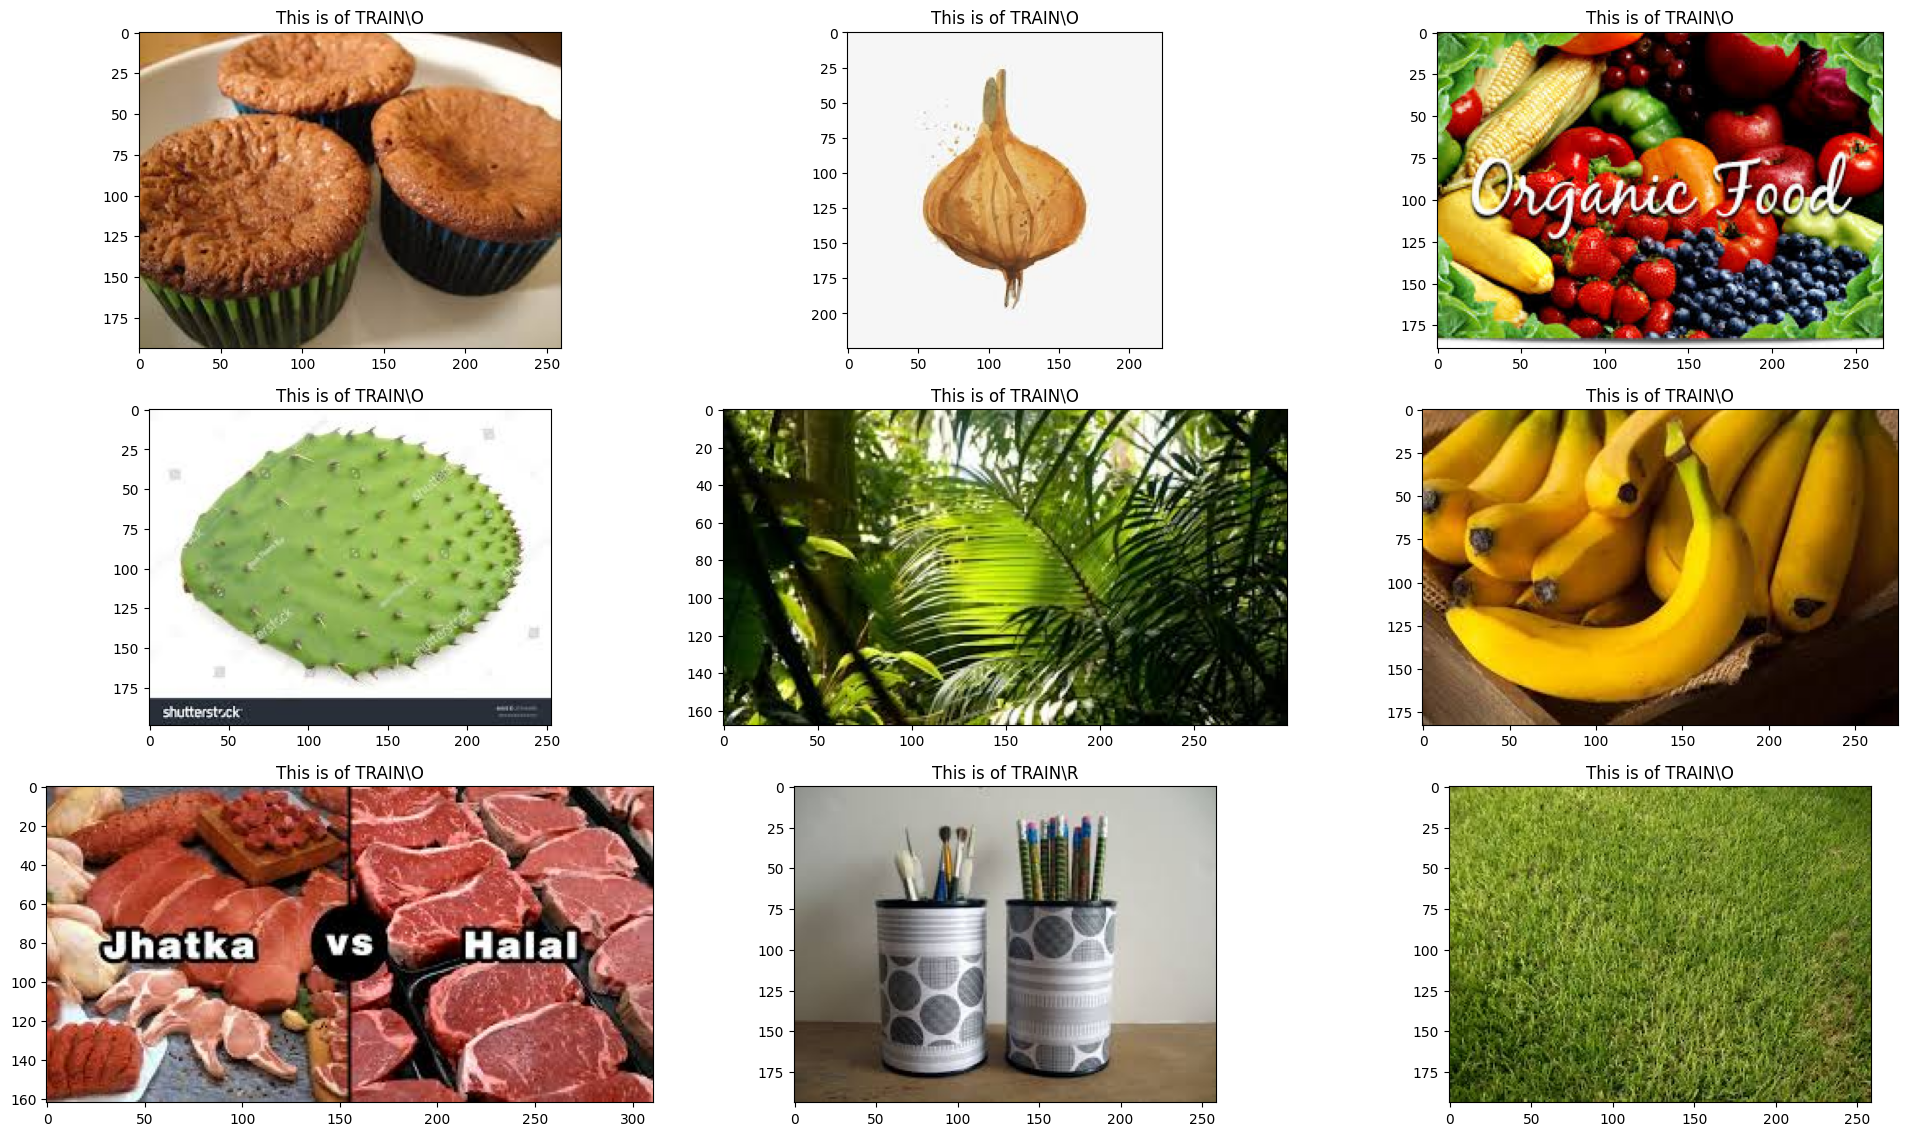

In [10]:
plt.figure(figsize=(20,15))
for i in range(9):
    plt.subplot(4, 3, (i%12)+1)
    index = np.random.randint(15000)
    plt.title('This is of {0}'.format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()

CNN - Convulutionl Neural Network

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape = (224,224,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss = "binary_crossentropy",
                optimizer ="adam",
                metrics = ["accuracy"])
batch_size =256

In [15]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 222, 222, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 109, 109, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 52, 52, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           514 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,245,186 (84.86 MB)

 Trainable params: 22,245,186 (84.86 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
train_datagen = ImageDataGenerator(rescale=1./255)

In [17]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [19]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (224, 224),
    batch_size = batch_size,
    color_mode ="rgb",
    class_mode = "categorical")

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size = (224, 224),
    batch_size = batch_size,
    color_mode ="rgb",
    class_mode = "categorical")

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [20]:
hist = model.fit(
    train_generator,
    epochs =10,
    validation_data=test_generator
)

Epoch 1/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 601s 7s/step - accuracy: 0.7065 - loss: 0.8569 - val_accuracy: 0.8321 - val_loss: 0.3905
Epoch 2/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 797s 9s/step - accuracy: 0.8187 - loss: 0.4190 - val_accuracy: 0.8679 - val_loss: 0.3240
Epoch 3/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 715s 8s/step - accuracy: 0.8405 - loss: 0.3804 - val_accuracy: 0.8969 - val_loss: 0.2921
Epoch 4/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 620s 7s/step - accuracy: 0.8582 - loss: 0.3556 - val_accuracy: 0.8731 - val_loss: 0.3189
Epoch 5/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 652s 7s/step - accuracy: 0.8629 - loss: 0.3349 - val_accuracy: 0.8814 - val_loss: 0.2938
Epoch 6/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 715s 8s/step - accuracy: 0.8754 - loss: 0.3088 - val_accuracy: 0.8675 - val_loss: 0.3073
Epoch 7/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 582s 7s/step - accuracy: 0.8784 - loss: 0.2970 - val_accuracy: 0.9073 - val_loss: 0.2514
Epoch 8/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 727s 8s/step - accuracy: 0.8937 - loss: 0.2710 - val_accuracy: 0.8973 - v